## Statistical analysis
*To statistically measure the impact of pre and post training on athletes, grouped by gender.*

### START ----------------------------------------------
### Import libraries

In [246]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (15, 6)

### Import data (csv files)
_csv files should be placed in the same folder_

In [247]:
df = pd.read_csv('data.csv', sep=',', header='infer')
#Above data is for the main workgroup SMTQ40 ATHLETES

df_pre = pd.read_csv('FINAL-SMTQ-PRE.csv', sep=',', header='infer')
#Above data is for the PRE test

df_post = pd.read_csv('FINAL-SMTQ-POST.csv', sep=',', header='infer')
#Above data is for the POST test

### Break down data into male and female groups

In [249]:
df_f = df[df.gender=='female']
df_m = df[df.gender=='male']

df_pre_f = df_pre[df_pre.gender=='female']
df_pre_m = df_pre[df_pre.gender=='male']


df_post_f = df_post[df_post.gender=='female']
df_post_m = df_post[df_post.gender=='male']

### Calculate mean for three categories, across the two groups

In [297]:
### Mean for confidence, constancy, control
main_conf = df_f.confidence.mean()
main_const = df_f.constancy.mean()
main_cont = df_f.control.mean()

main_qn = {'Confidence':[main_conf, main_conf],'Constancy':[main_const, main_const], 'Control':[main_cont, main_cont], 'gender':['Female','Male']}
main_data = pd.DataFrame.from_dict(main_qn)

### Mean for confidence, constancy, control from Pre-test
f_pre_conf = df_pre_f.confidence.mean()
f_pre_const = df_pre_f.constancy.mean()
f_pre_cont = df_pre_f.control.mean()

m_pre_conf = df_pre_m.confidence.mean()
m_pre_const = df_pre_m.constancy.mean()
m_pre_cont = df_pre_m.control.mean()

pre_qn = {'Confidence':[f_pre_conf, m_pre_conf],'Constancy':[f_pre_const, m_pre_const], 'Control':[f_pre_cont, m_pre_cont], 'gender':['Female','Male']}
pre_data = pd.DataFrame.from_dict(pre_qn)

### Mean for confidence, constancy, control from Post-test

f_post_conf = df_post_f.confidence.mean()
f_post_const = df_post_f.constancy.mean()
f_post_cont = df_post_f.control.mean()

m_post_conf = df_post_m.confidence.mean()
m_post_const = df_post_m.constancy.mean()
m_post_cont = df_post_m.control.mean()

post_qn = {'Confidence':[f_post_conf, m_post_conf],'Constancy':[f_post_const, m_post_const], 'Control':[f_post_cont, m_post_cont], 'gender':['Female','Male']}
post_data = pd.DataFrame.from_dict(post_qn)

### Set index to gender

In [298]:
main_data.set_index('gender', inplace=True)
pre_data.set_index('gender', inplace=True)
post_data.set_index('gender', inplace=True)

### Plot charts

<AxesSubplot:title={'center':'POST MENTAL TOUGHNESS Components (Confidence, Constancy, and Control) in MALE/FEMALE athletes'}, xlabel='gender'>

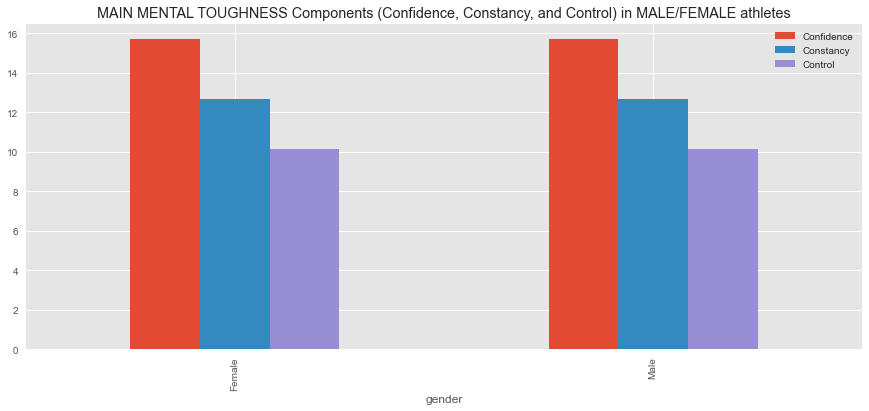

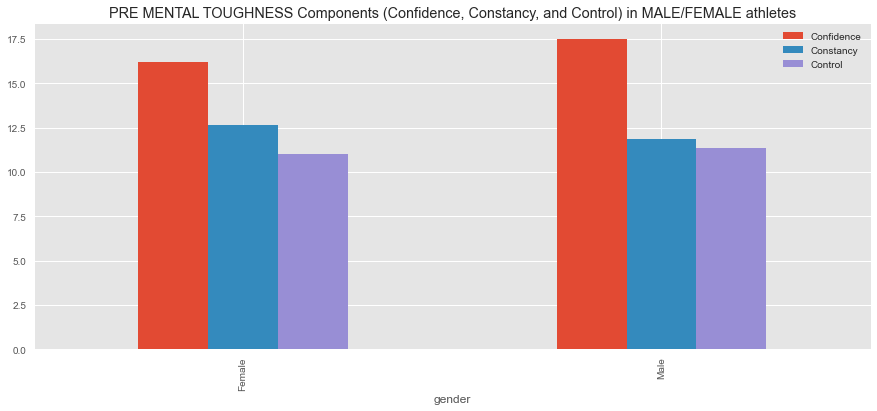

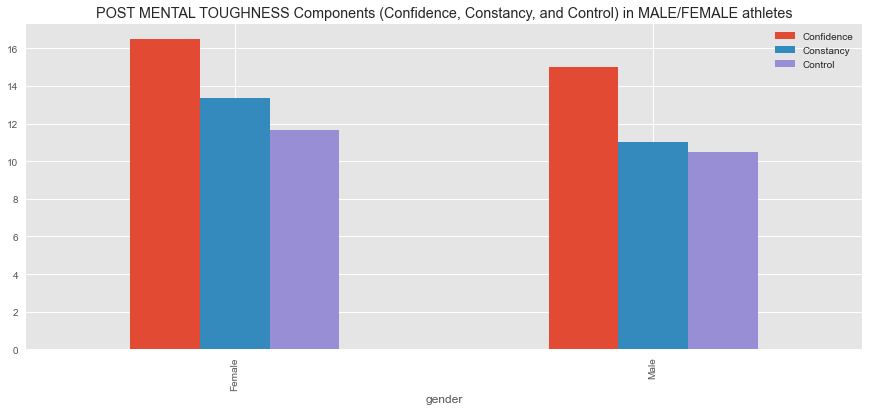

In [299]:
main_data.plot(kind='bar', title='MAIN MENTAL TOUGHNESS Components (Confidence, Constancy, and Control) in MALE/FEMALE athletes')
pre_data.plot(kind='bar', title='PRE MENTAL TOUGHNESS Components (Confidence, Constancy, and Control) in MALE/FEMALE athletes')
post_data.plot(kind='bar', title='POST MENTAL TOUGHNESS Components (Confidence, Constancy, and Control) in MALE/FEMALE athletes')

### Get the difference between pre and post test changes and plot the diff.

In [300]:
sub_table = post_data - pre_data
#sub_table[1:2]

<AxesSubplot:title={'center':'Change in Confidence, Constancy, Control in athletes Pre & Post Test'}, xlabel='gender'>

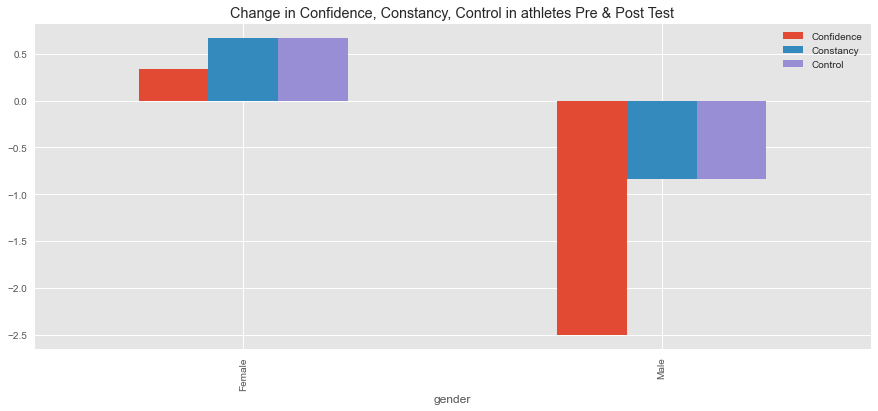

In [301]:
sub_table[:2].plot(kind='bar', title='Change in Confidence, Constancy, Control in athletes Pre & Post Test')

### Test for normality

In [302]:
#source: https://www.statology.org/normality-test-python/
from scipy.stats import shapiro 

print('TEST FOR NORMALITY (Females)\n')
f_conf = shapiro(df_f.confidence)
print('pvalue=',f_conf.pvalue)

if f_conf.pvalue < 0.05:
    print('Sample data for confidence for females does not come from a normal dist.')
else:
    print('Sample data for confidence for females is normally distributed\n')
    
f_const = shapiro(df_f.constancy)
print('pvalue=',f_const.pvalue)

if f_const.pvalue < 0.05:
    print('Sample data for constancy for females does not come from a normal dist.')
else:
    print('Sample data for constancy for females is normally distributed\n')
    
f_cont = shapiro(df_f.control)
print('pvalue=',f_cont.pvalue)

if f_cont.pvalue < 0.05:
    print('Sample data for control for females does not come from a normal dist.')
else:
    print('Sample data for control for females is normally distributed\n')
    
#------
print('TEST FOR NORMALITY (Males)\n')
m_conf = shapiro(df_m.confidence)
print('pvalue=',m_conf.pvalue)

if m_conf.pvalue < 0.05:
    print('Sample data for confidence for males does not come from a normal dist.')
else:
    print('Sample data for confidence for males is normally distributed\n')
    
m_const = shapiro(df_m.constancy)
print('pvalue=',m_const.pvalue)

if m_const.pvalue < 0.05:
    print('Sample data for constancy for males does not come from a normal dist.')
else:
    print('Sample data for constancy for males is normally distributed\n')
    
m_cont = shapiro(df_m.control)
print('pvalue=',m_cont.pvalue)

if m_cont.pvalue < 0.05:
    print('Sample data for control for males does not come from a normal dist.')
else:
    print('Sample data for control for males is normally distributed\n')


#From the output we can see that the test statistic is 0.857
#and the corresponding p-value is 3.88e-29 (extremely close to zero).
#Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
#This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

TEST FOR NORMALITY (Females)

pvalue= 0.766986608505249
Sample data for confidence for females is normally distributed

pvalue= 0.15451489388942719
Sample data for constancy for females is normally distributed

pvalue= 0.31410956382751465
Sample data for control for females is normally distributed

TEST FOR NORMALITY (Males)

pvalue= 0.7185503840446472
Sample data for confidence for males is normally distributed

pvalue= 0.1600966900587082
Sample data for constancy for males is normally distributed

pvalue= 0.0543455071747303
Sample data for control for males is normally distributed



### Plot the pdf/normal distribution curve

pvalue= 0.48987600207328796


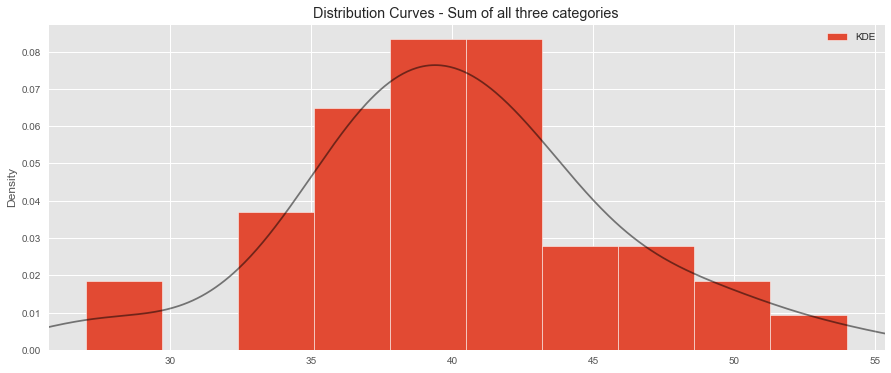

In [264]:
# Better way to plot the probability distribution of measured data,
# with a kernel density estimate
col_list= ['confidence', 'control', 'constancy']
df['Sum']=df[col_list]. sum(axis=1)

s = pd.Series(df['Sum'])

# Plot pandas histogram
s.plot.hist(density=True, edgecolor='w', linewidth=0.5)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which decreases readability
ax = plt.gca()
xlim = ax.get_xlim()

# Plot pandas KDE
s.plot.density(color='black', alpha=0.5) # identical to s.plot.kde(...)

# Reset hist x-axis limits and add legend
ax.set_xlim(xlim)
plt.title('Distribution Curves - Sum of all three categories')
ax.legend(labels=['KDE'], frameon=False)

conf = shapiro(df['Sum'])
print('pvalue=', conf.pvalue)

### Skewness and kurtosis test

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking.

Test whether the skew is different from the normal distribution.

This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.

In [290]:
from scipy.stats import skewtest, skew
variable = df['Sum']

print(skewtest(variable))

if round(skew(variable),3) > -0.5:
    print('Pass. Skewness value:', skew(variable))
elif round(skew(variable),3) < 0.5:
    print('Pass. Skewness value:',skew(variable))
else:
        print('FAIL!! Skewness value:',skew(variable))

SkewtestResult(statistic=0.29325813414129503, pvalue=0.76932485163616)
Pass. Skewness value: 0.10002878875321834


fairly symmetrical as the skewness lies between -0.5 and 0.5. Since the value is positive, the data is slightly skewed to the right— the right tail is slightly longer than the left tail.

Kurtosis of +1 and -1 shows fairly normal distribution, with no major skewness

In [292]:
kurtosis = df_m['constancy'].kurtosis()
print(f'Kurtosis = {kurtosis}')

Kurtosis = -1.00159962406015


### Extra info... _(Optional)_
-----------------------------------------------------------

<AxesSubplot:>

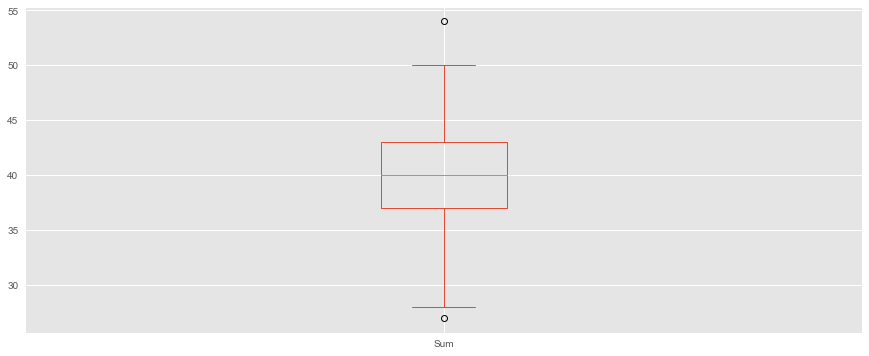

In [303]:
df['Sum'].plot(kind='box')
# Outliers detected

-----------------------------------------------------------

### Null hypothesis

In [305]:
#Source: https://towardsdatascience.com/levels-of-measurement-statistics-and-python-implementations-8ff8e7867d0b
# chi-square test
## Uncomment to use the appropriate data set
chiRes = stats.chi2_contingency(main_data)
#chiRes_pre = stats.chi2_contingency(pre_data)
#chiRes_post = stats.chi2_contingency(post_data)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 2.724567701616022e-30
p-value: 1.0
degree of freedom: 2
expected contingency table
[[15.72222222 12.66666667 10.16666667]
 [15.72222222 12.66666667 10.16666667]]


In [306]:
import statsmodels.api as sm
# An alternative approach usng stats model api to derive expected table
# statsmodel table object
table = sm.stats.Table(main_data) #Change here if chiRes is changed above
table.fittedvalues

,Confidence,Constancy,Control
gender,,,
Female,15.722222,12.666667,10.166667
Male,15.722222,12.666667,10.166667


In [307]:
main_data

,Confidence,Constancy,Control
gender,,,
Female,15.722222,12.666667,10.166667
Male,15.722222,12.666667,10.166667


In [308]:
# Can derive the direction of change between initial and expected table
# resid_pearson method returns a table of residuals
# positives - more observations than expected
# negatives - less observations than expected
table.resid_pearson

,Confidence,Constancy,Control
gender,,,
Female,1.343985e-15,4.991132e-16,5.571100e-16
Male,1.343985e-15,4.991132e-16,5.571100e-16


### END ----------------------------------------------

In [60]:
# chi-square test
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
# chi-square test statistic (alternative method to derive chi-sq stat)
chisq_stat = stats.chi2_contingency(ans1, correction=False)[0]
# sample size
n = np.sum(np.sum(ans1))
# minimum of rows & columns
minshape = min(ans1.shape)-1
# Cramer's v
V_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Cramer' V: {V_}")

chi-square statistic: 0.0775067429185544
p-value: 0.9619879335722572
Cramer' V: 0.031029287491305162


In [150]:
# chi-square test
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
# chi-square test statistic (alternative method to derive chi-sq stat)
chisq_stat = stats.chi2_contingency(ans1, correction=False)[0]
# sample size
n = np.sum(np.sum(ans1))
# minimum of rows & columns
minshape = min(ans1.shape)-1
# Phi
Phi_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Phi Coefficient: {Phi_}")

chi-square statistic: 2.6334015992570014e-30
p-value: 1.0
Phi Coefficient: 0.031029287491305162
